In [1]:
import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
!pip install langdetect

     |████████████████████████████████| 981 kB 4.3 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=86004acbcf478366671d74dc7a6c2d62ed8f1abf08e0aec454fbbe5cde1de987
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


#OS version 9.4

In [24]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/NLP_Project/LDA data/amazon data')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
df= pd.read_csv('amazon_OS94.csv')

In [26]:
df

,Unnamed: 0,Unnamed: 0.1,id,title,body,link,rating,verified_purchase,helpful_votes,year,month,version,bd_cleaned,sw_removed,stemmed
0,1005,1005,RC0VUELJ5J21Z,Credit Card Requirement,Roku's requirement that customers must provide...,https://www.amazon.com/gp/customer-reviews/RC0...,1,True,NaN,2021,4,O.S. 9.4,do not buy this product ours ran great for mon...,buy product ran great months stopped working c...,buy product ran great month stop work custom s...
1,1006,1006,R2SQ3VE76MFD77,Ruko,I have no complaints. It way better than the l...,https://www.amazon.com/gp/customer-reviews/R2S...,5,True,NaN,2021,4,O.S. 9.4,i purchased this roku as i wanted to see if i ...,purchased wanted see would able cut satellite ...,purchas want see would abl cut satellit cabl u...
2,1007,1007,RP1JOT9J32351,Fabulous product!!!,Fabulous product!! Works so well we bought a s...,https://www.amazon.com/gp/customer-reviews/RP1...,5,True,NaN,2021,4,O.S. 9.4,it really beats the roku hdmi sticks doesn t o...,really beats hdmi sticks heat keeps larger buf...,realli beat hdmi stick heat keep larger buffer...
3,1008,1008,RWU9G50GRAE2G,Better than cable!,I feel we waited way to long to cut the cable ...,https://www.amazon.com/gp/customer-reviews/RWU...,5,True,NaN,2021,4,O.S. 9.4,i love roku but it reboots if it is not used i...,love reboots used hours,love reboot use hour
4,1009,1008,R39YWYM402IOAH,Love It!,I recently upgraded my tv to 4K. I’ve always h...,https://www.amazon.com/gp/customer-reviews/R39...,5,True,NaN,2021,4,O.S. 9.4,the device is as great as all roku s are but r...,device great go f even letting use blasted thi...,devic great go f even let use blast thing ente...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,1709,1708,R3P8VTUWBT3VRI,Ruined by latest sofware update,My Roku Ultra is making a popping sound since ...,https://www.amazon.com/gp/customer-reviews/R3P...,1,False,3.0,2020,12,O.S. 9.4,the mute didn t work lip sync was off on movie...,mute work lip sync movies shows would restart ...,mute work lip sync movi show would restart get...
705,1710,1710,RPMRAIK4R24PD,Excelente compra,Gran variedad de contenido. Se mueve muy rápid...,https://www.amazon.com/gp/customer-reviews/RPM...,5,True,NaN,2020,12,O.S. 9.4,i replaced my roku to be able to do atmos dolb...,replaced able atmos dolby vision know unit ups...,replac abl atmo dolbi vision know unit upscal ...
706,1711,1711,R2XT1VPCB1O9W0,Excellent,Replacing the entrance level 4k Roku. Truly an...,https://www.amazon.com/gp/customer-reviews/R2X...,5,True,NaN,2020,12,O.S. 9.4,i got this new roku unit specifically so that ...,got new unit specifically could connect blueto...,got new unit specif could connect bluetooth he...
707,1712,1712,RFE3DJ7EAQZDO,Happy,Ordered this for my son?!!!! He says it fantas...,https://www.amazon.com/gp/customer-reviews/RFE...,5,True,NaN,2020,12,O.S. 9.4,returned because picture kept cutting out and ...,returned picture kept cutting support repeated...,return pictur kept cut support repeat themself...


In [28]:
df['body'] = df['body'].replace(np.nan, '')

In [29]:
import re
def cleaner(text):
    return re.sub("^[a-zA_Z0-9]+", " ", text).strip().lower()


df["cleaned_bd"]=df["body"].apply(cleaner).to_list()

# remove stop words 
def stop_word_remove(i):
    from nltk.corpus import stopwords
    stops=stopwords.words("english")
    stops.extend(['from', 'subject', 're', 'edu', 'use', 'https', 'roku', 'amp', 'co'])
    ret=[w for w in i.split() if w not in stops]
    return " ".join(ret)


In [30]:
df["final"]=df["cleaned_bd"].apply(stop_word_remove)

new_dataframe = df["final"].tolist()

In [31]:
#wordcloud

import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
import urllib.request
from matplotlib import pyplot as plt
from wordcloud import WordCloud
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

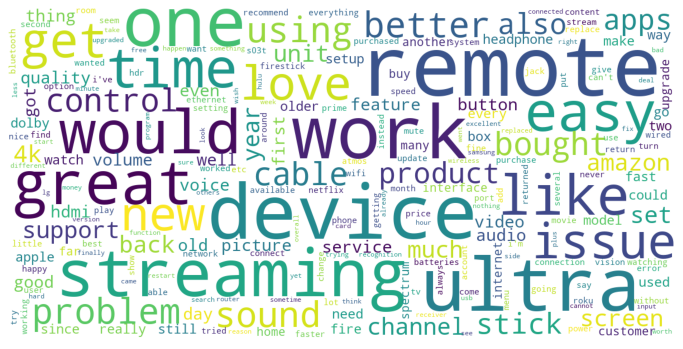

In [32]:
def show_wordcloud(data):
    stopwords = nltk.corpus.stopwords.words('english')
    stopwords.append('https')
    stopwords.extend(['roku', 'co', 'tv', 'app', 'amp'])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=300,
        max_font_size=50,
        scale=3,
        random_state = 1,
        collocations=False)
   
    wordcloud=wordcloud.generate(str(new_dataframe))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(new_dataframe)

## 10 popular words: romote, work, would, device, streaming, ultra, great, one, easy, like

# OS version 10

In [33]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/NLP_Project/LDA data/amazon data')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
df= pd.read_csv('amazon_OS10.csv')

In [35]:
df['body'] = df['body'].replace(np.nan, '')

import re
def cleaner(text):
    return re.sub("^[a-zA_Z0-9]+", " ", text).strip().lower()


df["cleaned_bd"]=df["body"].apply(cleaner).to_list()

# remove stop words 
def stop_word_remove(i):
    from nltk.corpus import stopwords
    stops=stopwords.words("english")
    stops.extend(['from', 'subject', 're', 'edu', 'use', 'https', 'roku', 'amp', 'co'])
    ret=[w for w in i.split() if w not in stops]
    return " ".join(ret)

df["final"]=df["cleaned_bd"].apply(stop_word_remove)

new_dataframe1 = df["final"].tolist()

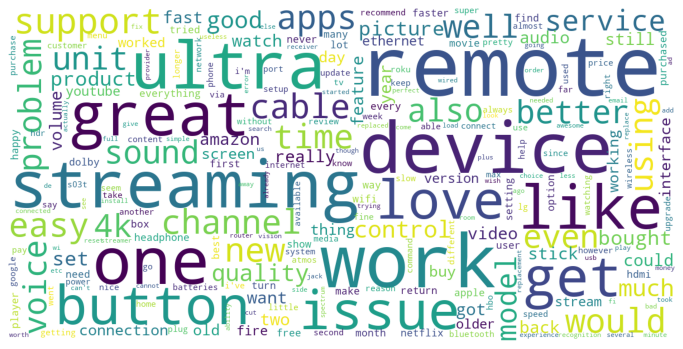

In [36]:
def show_wordcloud(data):
    stopwords = nltk.corpus.stopwords.words('english')
    stopwords.append('https')
    stopwords.extend(['roku', 'co', 'tv', 'app', 'amp'])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=300,
        max_font_size=50,
        scale=3,
        random_state = 1,
        collocations=False)
   
    wordcloud=wordcloud.generate(str(new_dataframe1))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(new_dataframe1)

## 10 popular words: ultra, remote, great, device, streaming, love, like, one, work, get, button

#OS vrsion 10.5

In [37]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/NLP_Project/LDA data/amazon data')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
df= pd.read_csv('amazon_OS10_5.csv')

In [40]:
df['body'] = df['body'].replace(np.nan, '')

import re
def cleaner(text):
    return re.sub("^[a-zA_Z0-9]+", " ", text).strip().lower()


df["cleaned_bd"]=df["body"].apply(cleaner).to_list()

# remove stop words 
def stop_word_remove(i):
    from nltk.corpus import stopwords
    stops=stopwords.words("english")
    stops.extend(['from', 'subject', 're', 'edu', 'use', 'https', 'roku', 'amp', 'co'])
    ret=[w for w in i.split() if w not in stops]
    return " ".join(ret)

df["final"]=df["cleaned_bd"].apply(stop_word_remove)

new_dataframe2 = df["final"].tolist()

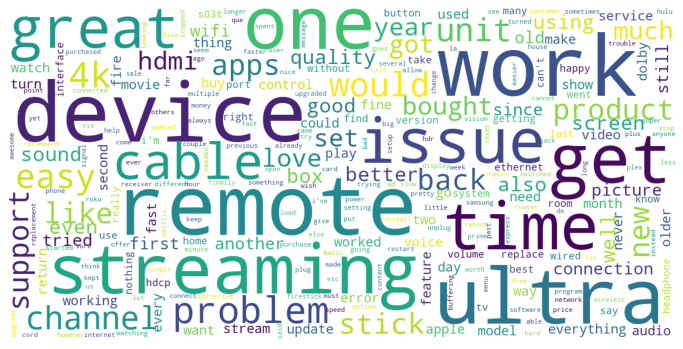

In [41]:
def show_wordcloud(data):
    stopwords = nltk.corpus.stopwords.words('english')
    stopwords.append('https')
    stopwords.extend(['roku', 'co', 'tv', 'app', 'amp', 'amazon', 'youtube'])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=300,
        max_font_size=50,
        scale=3,
        random_state = 1,
        collocations=False)
   
    wordcloud=wordcloud.generate(str(new_dataframe2))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(new_dataframe2)

## 10 popular words: remote, device, work, streaming, ultra, time, get, issue, great, one